In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from svm_margin_plot import plot_svm_boundary

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df['Result'] = df['Compressive Strength (28-day)(Mpa)'] 

In [8]:
df =df.drop('Compressive Strength (28-day)(Mpa)',axis = 1)

In [9]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Result
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


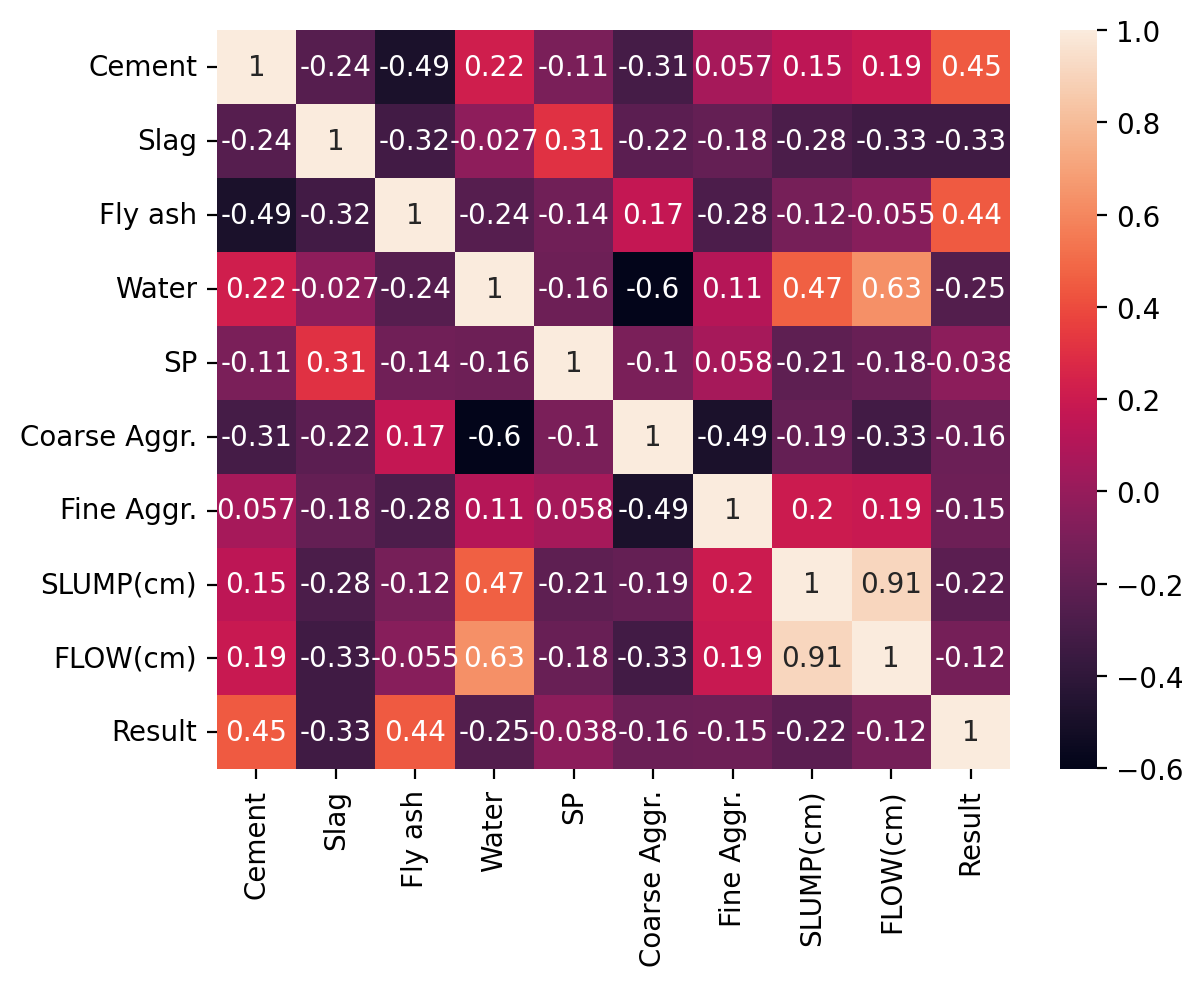

In [12]:
plt.figure(dpi=200)
sns.heatmap(df.corr(),annot = True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Result',axis = 1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.svm import LinearSVR,SVR

In [20]:
model = SVR()

In [23]:
model.fit(scaled_X_train,y_train)

SVR()

In [24]:
preds = model.predict(scaled_X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mae = mean_absolute_error(y_test,preds)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,preds))

In [29]:
mae,rmse

(4.680550861162789, 6.078255017457036)

In [30]:
## Now we try with grid search 
param_grid = {'C':[0.01,0.1,1,0.5],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0.1,0.2,0,1,.01,.02,.5,2]}


In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid,cv=5,verbose=1)

In [34]:
grid.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 0.5], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.2, 0, 1, 0.01, 0.02, 0.5, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [35]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [36]:
pred = grid.predict(scaled_X_test)

In [37]:
mae1 = mean_absolute_error(y_test,pred)

In [38]:
mae1,mae

(1.8530688105852298, 4.680550861162789)

In [39]:
rmse2 = np.sqrt(mean_squared_error(y_test,pred))

In [40]:
rmse2,rmse

(2.2802712928131372, 6.078255017457036)